#### Project 1: Edge Detection Application

In [1]:
# Import libraries.
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import re


# Function to validate age.
def validate_age(dob_str):
    try:
        dob = datetime.strptime(dob_str, '%Y-%m-%d')
        age = datetime.now().year - dob.year
        return age >= 18
    except ValueError:
        return False


# Function to validate email.
def validate_email(email):
    # Regular expression for email validation
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email)


# Function for user sign up.
def sign_up():
    print("\n=== SIGN UP ===")
    while True:
        # Collect user's email and dob.
        email = input("\nEnter your email or 'quit' to return to the main menu: ")
        if email.lower() == 'quit':
            print("\nReturning to the authentication page...")
            break
        else:
            if validate_email(email):
                break
            else:
                print("\nInvalid email address. Please try again.")

    dob_str = input("Enter your date of birth (YYYY-MM-DD):")
    if validate_age(dob_str):
        # Save user's credentials to a file.
        with open("database/credentials/visitor_credentials.txt", "a") as file:
            file.write(f"{email},{dob_str}\n")

        print("\nSign up successful!")
        return True
    else:
        print("\nPeople below 18 years are not permitted to use this application.")
        print("\nReturning to the main menu...")
        return False


# Function for user login.
def sign_in():
    print("\n=== SIGN IN ===")
    # Load existing user credentials from file.
    database = []
    with open("database/credentials/visitor_credentials.txt", "r") as file:
        for line in file:
            email, _ = line.strip().split(",")
            database.append(email)

    while True:
        # Request email from the user.
        email = input("\nEnter your email or 'quit' to exit: ")
        if email.lower() == 'quit':
            print("\nExiting login process...")
            return False

        # Check if email is in database.
        if email in database:
            print("\nLogin successful!")
            return email
        else:
            print("\nEmail not recognised, please sign up.")




In [2]:
# Function to handle verify user inputs.
def choice_verification(choice, first, last, rand):
    if choice.isdigit() and (first <= int(choice) <= last):
        choice = int(choice)
        if choice == rand:
            choice = random.choice(list(range(first, rand)))
            return choice
        else:
            return choice
    else:
        print(f"Invalid choice. Please enter a number between {first} and {last}:")
        return None


# Function to check validity of user input
def isValid(input):
    if input.isdigit() and int(input) < 10000:
        return True
        


# Auth Page
def authentication_page():
    print("\n=== AUTHENTICATION PAGE ===")
    print("1. Sign up")
    print("2. Sign in")
    print("3. Quit")
    choice = input("Enter your choice: ")
    return choice


# Collection Page
def collection_page(choice):
    print("\n=== COLLECTIONS PAGE ===")
    print("1. Traditional Art")
    print("2. Modern Art")
    print("3. Contemporary Art")
    print("4. Randomly select")
    print("5. Log out")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 5, 4)
        if choice:
            return choice


# Traditional Art Page
def traditional():
    print("\n=== TRADITIONAL ART ===")
    print("1. Benin King Bust")
    print("2. Benin Queen Bust")
    print("3. Igbo-Ukwu Art")
    print("4. Female Nok Head")
    print("5. Male Nok Head")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Contemporary Art Page
def contemporary():
    print("\n=== MODERN ART ===")
    print("1. Durbar: David Dale [1999]")
    print("2. In the Country: David Dale[1997]")
    print("3. Fulani Dancers Part: Lara Ige [1994]")
    print("4. The Evening for Milkmaids: Lara Ige [1991]")
    print("5. Home Bond: Hamid Ibrahim [1995]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Modern Art Page
def modern():
    print("\n=== MODERN ART ===")
    print("1. Fulani Herdsmen: Victor Epuk [1997]")
    print("2. Tales By Moonlight: Victor Epuk [1997]")
    print("3. Panel of 5: Bruce Onobrakpeya [1987]")
    print("4. Landscape from the North: Kolade Oshinowo [2003]")
    print("5. Red Sky: David Dale [1975]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


# Main Menu
def operator_page():
    print("\n=== TRANSFORMATION PAGE ===")
    print("\nWhich edge detection operator would you like to use on your image?")
    print("1. Sobel")
    print("2. Prewitt")
    print("3. Robert")
    print("4. Laplacian")
    print("5. Canny")
    print("6. View Image")
    print("7. Change image [ Menu ]")
    choice = input("Enter your choice: ")
    return choice


# Function for image blurring.
def blur(image):
    print('\n=== IMAGE BLURRING ===')

    print("\nIt is highly recommended that you blur your image before carrying out edge detection.\nDo you agree?")
    print("1. Yes\n2. No")
    response = input("\n\n>>> ")

    new_image = None
    
    while True:
        if response == "1":
            while True:
                print("\nWhat type of blurring would you like to carry out on your image?")
                print("1. Gaussian Blur")
                print("2. Median Blur")
                print("3. Bilateral Blur")
                print("4. Main Menu")
                choice = input("Enter your choice: ")
                
                if choice.isdigit() and (1 <= int(choice) <= 4):
                    choice = int(choice)
                    if choice == 1:
                        print('\n=== GAUSSIAN BLUR ===')
                
                        # Plot the original image.
                        display(1, "Original", image)
                        
                        gaussian_blurred_img = cv2.GaussianBlur(image, (7, 7), 0)
        
                        # Plot the blurred image.
                        display(2, "Gaussian Blur", gaussian_blurred_img)
                        
                        # window_display(gaussian_blurred_img, "gaussian_blurred_img")
        
                        new_image = gaussian_blurred_img
                        return new_image
                    
                    elif choice == 2:
                        print('\n=== MEDIAN BLUR ===')
                
                        # Plot the original image.
                        display(1, "Original", image)
                        
                        median_blurred_img = cv2.medianBlur(image, 5)
        
                        # Plot the blurred image.
                        display(2, "Median Blur", median_blurred_img)
                        
                        # window_display(median_blurred_img, "median_blurred_img")
                        
                        new_image = median_blurred_img
                        return new_image
        
                    elif choice == 3:
                        print('\n=== BILATERAL BLUR ===')
        
                        # Plot the original image.
                        display(1, "Original", image)
                        
                        bilateral_blurred_img = cv2.bilateralFilter(image, 9, 75, 75)
        
                        # Plot the blurred image.
                        display(2, "Bilateral Blur", bilateral_blurred_img)
                        
                        # window_display(bilateral_blurred_img, "bilateral_blurred_img")
                        
                        new_image = bilateral_blurred_img
                        return new_image
                    
                    elif choice == 4:
                        print('\nRedirecting to Main Menu...')
                        return None      
                else:
                    print("Invalid choice. Please enter a number between 1 and 4:")

        elif response == "2":
            new_image = image
            return new_image

        else:
            print("Invalid choice. Please try again: ")


# Function for displaying images (plotting).
def display(position, title, image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, position)
    plt.title(title)
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imshow(image, cmap='viridis')
    plt.axis('off')
    # plt.imshow(image)
    plt.show()


# Function for Window Display.
def window_display(image, image_name):
    cv2.imshow('Image', image)
    cv2.imwrite(f"output/{image_name}.jpg", image)
    cv2.destroyAllWindows()


# Function for Sobel edge detection.
def sobel(image_path):
    print('\n=== SOBEL EDGE DETECTOR ===')
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Blur image.
    image = blur(image)
    
    # Resize images
    image = cv2.resize(image, (400, 400))
    
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the gradient images
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    
    # Display the original image and the Sobel edges
    display(1, "Original", image)
    display(2, "Sobel Edges", np.uint8(sobel_combined))
    
    cv2.imshow("Original", image)
    cv2.imshow("Sobel Edges", np.uint8(sobel_combined))
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# Function for Prewitt edge detection.
def prewitt(image_path):
    print('\n=== PREWITT EDGE DETECTOR ===')
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Blur image.
    image = blur(image)
    
    # Resize images
    image = cv2.resize(image, (500, 400))
    
    
    # Define Prewitt kernels
    kernel_x = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])
    
    kernel_y = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])  
    
    # Apply Prewitt edge detection
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)
    
    # Compute the magnitude of gradients manually
    prewitt_combined = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))
    
    # Display the original image and the Prewitt edges
    display(1, "Original", image)
    display(2, "Prewitt Edges", np.uint8(prewitt_combined))
    
    cv2.imshow("Original", image)
    cv2.imshow("Prewitt Edges", np.uint8(prewitt_combined))
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# Function for Robert edge detection.
def robert(image_path):
    print('\n=== ROBERT EDGE DETECTOR ===')
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Blur image.
    image = blur(image)
    
    # Resize images
    image = cv2.resize(image, (400, 400))
    
    # Define Robert kernels
    kernel_x = np.array([
        [1, 0],
        [0, -1]
    ])
    
    kernel_y = np.array([
        [0, 1],
        [-1, 0]
    ])
    
    # Apply Robert edge detection
    robert_x = cv2.filter2D(image, -1, kernel_x)
    robert_y = cv2.filter2D(image, -1, kernel_y)
    
    # Compute the magnitude of gradients manually
    robert_combined = np.sqrt(np.square(robert_x) + np.square(robert_y))
    
    # Resize images
    image = cv2.resize(image, (400, 400))
    
    # Display the original image and the Robert edges
    display(1, "Original", image)
    display(2, "Robert Edges", np.uint8(robert_combined))
    
    cv2.imshow("Original", image)
    cv2.imshow("Robert Edges", np.uint8(robert_combined))
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Function for Laplacian edge detection.
def laplacian(image_path):
    print('\n=== LAPLACIAN EDGE DETECTOR ===')
    
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize images
    image = cv2.resize(image, (400, 400))

    # Blur image.
    image = blur(image)
    
    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Convert the output to an 8-bit image
    laplacian = cv2.convertScaleAbs(laplacian)
    
    # Display the original image and the Laplacian edges
    display(1, "Original", image)
    display(2, "Laplacian Edges", np.uint8(laplacian))
    
    cv2.imshow("Original", image)
    cv2.imshow("Laplacian Edges", laplacian)
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()



# Function for Canny edge detection.
def canny(image_path):
    print('\n=== CANNY EDGE DETECTOR ===')
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize images
    image = cv2.resize(image, (400, 400))
    
    # Perform Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Blur image.
    # image = blur(image)
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)
    
    # Display the original image and the Canny edges
    display(1, "Original", image)
    display(2, "Canny Edges", np.uint8(edges))
    
    cv2.imshow("Original", image)
    cv2.imshow("Canny Edges", edges)
    
    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Function for image viewer.
def view(image_path):
    print('\n=== IMAGE VIEWER ===')
    image = cv2.imread(image_path, 0)
    display(1, "ARTWORK", image)
    return True


# Function to perform image operator based on user's choice.
def edge_detect(image_path, operator_choice):
    operators = {
        "1": sobel,
        "2": prewitt,
        "3": robert,
        "4": laplacian,
        "5": canny,
        "6": view
    }

    # Check if operator_choice is valid
    print("Looking for bugs?")
    if operator_choice in operators:
        operators[operator_choice](image_path)
    else:
        print("Invalid operator choice.")



Welcome to the Edge Detection Application!

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  1



=== SIGN UP ===



Enter your email or 'quit' to return to the main menu:  dmoru@pau.edu.ng
Enter your date of birth (YYYY-MM-DD): 1970-01-01



Sign up successful!

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  dmoru@pau.edu.ng



Invalid choice. Please try again.

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  2



=== SIGN IN ===



Enter your email or 'quit' to exit:  dmoru@pau.edu.ng



Login successful!

=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  4



=== MODERN ART ===
1. Fulani Herdsmen: Victor Epuk [1997]
2. Tales By Moonlight: Victor Epuk [1997]
3. Panel of 5: Bruce Onobrakpeya [1987]
4. Landscape from the North: Kolade Oshinowo [2003]
5. Red Sky: David Dale [1975]
6. Randomly select


Enter your choice:  6



=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  6


Looking for bugs?

=== IMAGE VIEWER ===


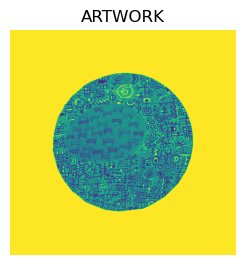


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  7



Redirecting to Main Menu...


=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  4



=== TRADITIONAL ART ===
1. Benin King Bust
2. Benin Queen Bust
3. Igbo-Ukwu Art
4. Female Nok Head
5. Male Nok Head
6. Randomly select


Enter your choice:  6



=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  6


Looking for bugs?

=== IMAGE VIEWER ===


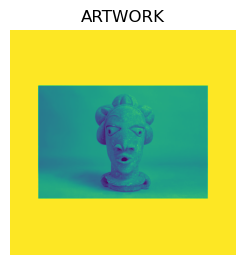


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  1


Looking for bugs?

=== SOBEL EDGE DETECTOR ===

=== IMAGE BLURRING ===

It is highly recommended that you blur your image before carrying out edge detection.
Do you agree?
1. Yes
2. No




>>>  1



What type of blurring would you like to carry out on your image?
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur
4. Main Menu


Enter your choice:  1



=== GAUSSIAN BLUR ===


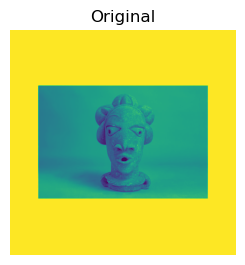

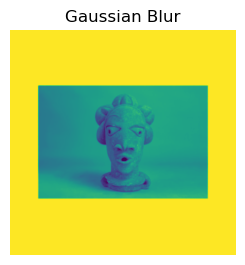

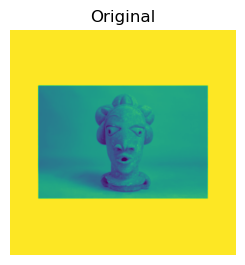

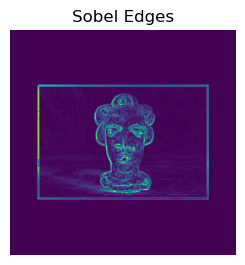


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  2


Looking for bugs?

=== PREWITT EDGE DETECTOR ===

=== IMAGE BLURRING ===

It is highly recommended that you blur your image before carrying out edge detection.
Do you agree?
1. Yes
2. No




>>>  1



What type of blurring would you like to carry out on your image?
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur
4. Main Menu


Enter your choice:  2



=== MEDIAN BLUR ===


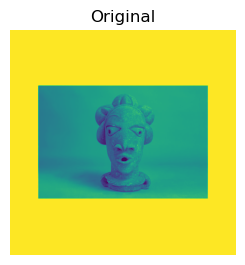

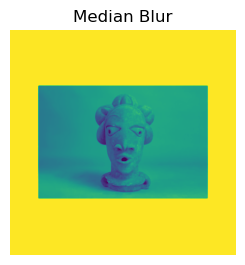

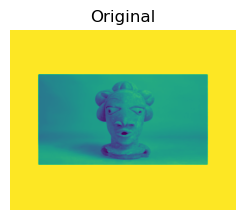

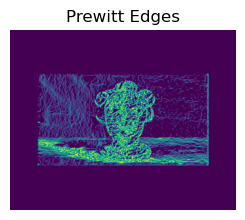


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  3


Looking for bugs?

=== ROBERT EDGE DETECTOR ===

=== IMAGE BLURRING ===

It is highly recommended that you blur your image before carrying out edge detection.
Do you agree?
1. Yes
2. No




>>>  1



What type of blurring would you like to carry out on your image?
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur
4. Main Menu


Enter your choice:  3



=== BILATERAL BLUR ===


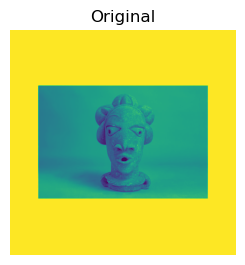

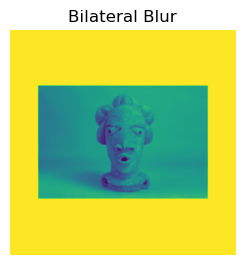

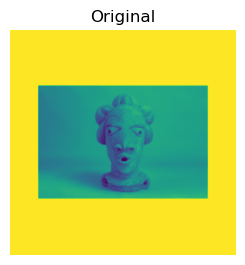

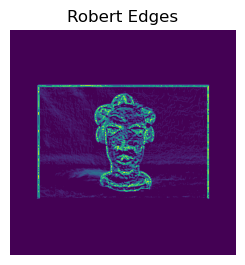


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  4


Looking for bugs?

=== LAPLACIAN EDGE DETECTOR ===

=== IMAGE BLURRING ===

It is highly recommended that you blur your image before carrying out edge detection.
Do you agree?
1. Yes
2. No




>>>  1



What type of blurring would you like to carry out on your image?
1. Gaussian Blur
2. Median Blur
3. Bilateral Blur
4. Main Menu


Enter your choice:  1



=== GAUSSIAN BLUR ===


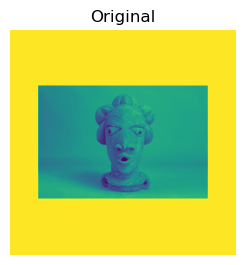

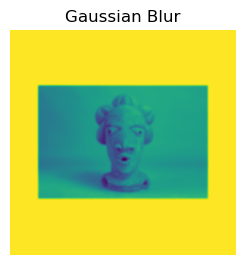

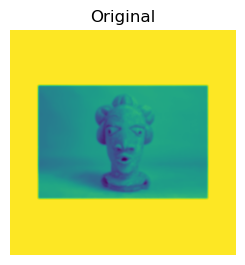

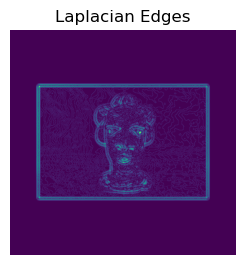


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  5


Looking for bugs?

=== CANNY EDGE DETECTOR ===


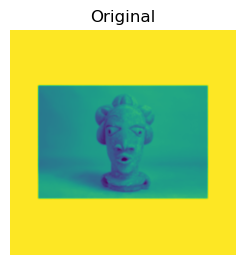

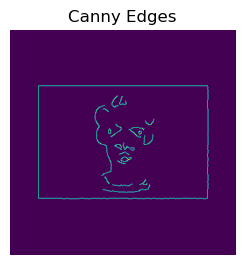


=== TRANSFORMATION PAGE ===

Which edge detection operator would you like to use on your image?
1. Sobel
2. Prewitt
3. Robert
4. Laplacian
5. Canny
6. View Image
7. Change image [ Menu ]


Enter your choice:  7



Redirecting to Main Menu...


=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  5



Logging you out...

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  3



Exiting the Edge Detection Application...


In [3]:
# Main function to execute the application
def main():
    print("Welcome to the Edge Detection Application!")
    
    while True:
        choice = authentication_page()
        if choice == "1":
            sign_up()
        elif choice == "2":
            email = sign_in()
            if email:
                while True:
                    # Select a collection
                    collection = ['traditional','modern','contemporary']
                    choice = int(collection_page(choice)) - 1
                    if choice < 3:
                        chosen = collection[choice]
                    else:
                        print("\nLogging you out...")
                        break

                    # Select an image from the chosen collection.
                    if choice == 0:
                        image = traditional()
                    elif choice == 1:
                        image = modern()
                    elif choice == 2:
                        image = contemporary()
                        

                    # Get the image path.
                    image_path = f"database/collections/{chosen}/{image}.jpg"

                    # Inner loop to carry out various edge operators on the same image.
                    while True:
                        # Get edge operator
                        operator_choice = operator_page()
                        
                        # Check if the input is a valid choice (a number between 1 and 7)
                        if operator_choice.isdigit() and 1 <= int(operator_choice) <= 7:
                            if operator_choice == "7":
                                print('\nRedirecting to Main Menu...\n')
                                break

                            else:
                                # Perform selected enhancement on the user's image
                                if os.path.exists(image_path):
                                    edge_detect(image_path, operator_choice)
                                else:
                                    print("Image not found.")
                        else:
                            print("\nInvalid choice. Please enter a number between 1 and 7:")
        elif choice == "3":
            print("\nExiting the Edge Detection Application...")
            break
        else:
            print("\nInvalid choice. Please try again.")


# Execute the main function
if __name__ == "__main__":
    main()
    
